# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saskia Putri Maharani
- **Email:** M001D4KX2270@bangkit.academy
- **ID Dicoding:** ssaasskkii

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Musim apa yang mengalami persewaan sepeda paling banyak pada periode tahun 2011 - 2012?
- Pertanyaan 2: Berapa rata-rata persewaan sepeda pada bulan Agustus? Bulan apakah yang memiliki rata-rata tertinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [2]:
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving day.csv to day.csv


Saving hour.csv to hour.csv


In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

0

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.duplicated().sum()

0

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
day_df.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [14]:
hour_df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Cleaning Data

In [15]:
day_df.drop(['holiday'], axis = 1, inplace = True)
hour_df.drop(['holiday'], axis = 1, inplace = True)

In [16]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
day_df = day_df.rename(columns = {'weathersit' : 'weather',
                                  'yr' : 'year',
                                  'mnth' : 'month',
                                  'hr' : 'hour',
                                  'hum' : 'humidity',
                                  'cnt' : 'total_count',
                                  'dteday' : 'date',
                                  'weekday' : 'day'})
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
category_columns = ['season', 'month', 'day', 'workingday', 'weather']

for col in category_columns:
  day_df[col] = day_df[col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      731 non-null    int64   
 1   date         731 non-null    object  
 2   season       731 non-null    category
 3   year         731 non-null    int64   
 4   month        731 non-null    category
 5   day          731 non-null    category
 6   workingday   731 non-null    category
 7   weather      731 non-null    category
 8   temp         731 non-null    float64 
 9   atemp        731 non-null    float64 
 10  humidity     731 non-null    float64 
 11  windspeed    731 non-null    float64 
 12  casual       731 non-null    int64   
 13  registered   731 non-null    int64   
 14  total_count  731 non-null    int64   
dtypes: category(5), float64(4), int64(5), object(1)
memory usage: 62.0+ KB


In [19]:
datetime_columns = ['date']
for col in datetime_columns:
  day_df[col] = pd.to_datetime(day_df[col])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    int64         
 4   month        731 non-null    category      
 5   day          731 non-null    category      
 6   workingday   731 non-null    category      
 7   weather      731 non-null    category      
 8   temp         731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  humidity     731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  total_count  731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
m

In [20]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
hour_df = hour_df.rename(columns = {'weathersit' : 'weather',
                                  'yr' : 'year',
                                  'mnth' : 'month',
                                  'hr' : 'hour',
                                  'hum' : 'humidity',
                                  'cnt' : 'total_count',
                                  'dteday' : 'date',
                                  'weekday' : 'day'})
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
category_columns = ['season', 'month', 'hour', 'day', 'workingday', 'weather']

for col in category_columns:
  hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   date         17379 non-null  object  
 2   season       17379 non-null  category
 3   year         17379 non-null  int64   
 4   month        17379 non-null  category
 5   hour         17379 non-null  category
 6   day          17379 non-null  category
 7   workingday   17379 non-null  category
 8   weather      17379 non-null  category
 9   temp         17379 non-null  float64 
 10  atemp        17379 non-null  float64 
 11  humidity     17379 non-null  float64 
 12  windspeed    17379 non-null  float64 
 13  casual       17379 non-null  int64   
 14  registered   17379 non-null  int64   
 15  total_count  17379 non-null  int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [23]:
datetime_columns = ['date']
for col in datetime_columns:
  hour_df[col] = pd.to_datetime(hour_df[col])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  int64         
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   day          17379 non-null  category      
 7   workingday   17379 non-null  category      
 8   weather      17379 non-null  category      
 9   temp         17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  humidity     17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  total_count  17379 non-null  int64         
dtypes: c

In [24]:
day_df.season.replace((1, 2, 3, 4), ('Winter', 'Spring', 'Summer', 'Fall'), inplace = True)
day_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace = True)
day_df.day.replace((0, 1, 2, 3, 4, 5, 6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace = True)
day_df.year.replace((0, 1), ('2011', '2012'), inplace = True)
day_df.weather.replace((1, 2, 3, 4), ('Clear', 'Mist', 'Light Snow', 'Heavy Rain'), inplace = True)
day_df.workingday.replace((0, 1), ('Weekend/Holiday', 'Workingday'), inplace = True)

hour_df.season.replace((1, 2, 3, 4), ('Winter', 'Spring', 'Summer', 'Fall'), inplace = True)
hour_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace = True)
hour_df.day.replace((0, 1, 2, 3, 4, 5, 6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace = True)
hour_df.year.replace((0, 1), ('2011', '2012'), inplace = True)
hour_df.weather.replace((1, 2, 3, 4), ('Clear', 'Mist', 'Light Snow', 'Heavy Rain'), inplace = True)
hour_df.workingday.replace((0, 1), ('Weekend/Holiday', 'Workingday'), inplace = True)

In [25]:
day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,Sat,Weekend/Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,Sun,Weekend/Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,Mon,Workingday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,Tue,Workingday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,Wed,Workingday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,Jan,0,Sat,Weekend/Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,Sat,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,Sat,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,Sat,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,Sat,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


Tidak ada missing values/null pada dataset. Sehingga hanya diubah tipe data.

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

In [27]:
day_df.groupby('season')['total_count'].sum().reset_index().sort_values('total_count')

,season,total_count
0,Winter,471348
3,Fall,841613
1,Spring,918589
2,Summer,1061129


In [28]:
day_df.groupby('month')['total_count'].mean().reset_index().sort_values('total_count')

,month,total_count
0,Jan,2176.338710
1,Feb,2655.298246
11,Dec,3403.806452
2,Mar,3692.258065
10,Nov,4247.183333
3,Apr,4484.900000
9,Oct,5199.225806
4,May,5349.774194
6,Jul,5563.677419
7,Aug,5664.419355


In [29]:
day_df.registered.sum()

2672662

## Visualization & Explanatory Analysis

###Pertanyaan 1: Musim apa yang mengalami persewaan sepeda paling banyak pada periode tahun 2011 - 2012?

[Text(0.5, 1.0, 'Count of Bikes During Different Season')]

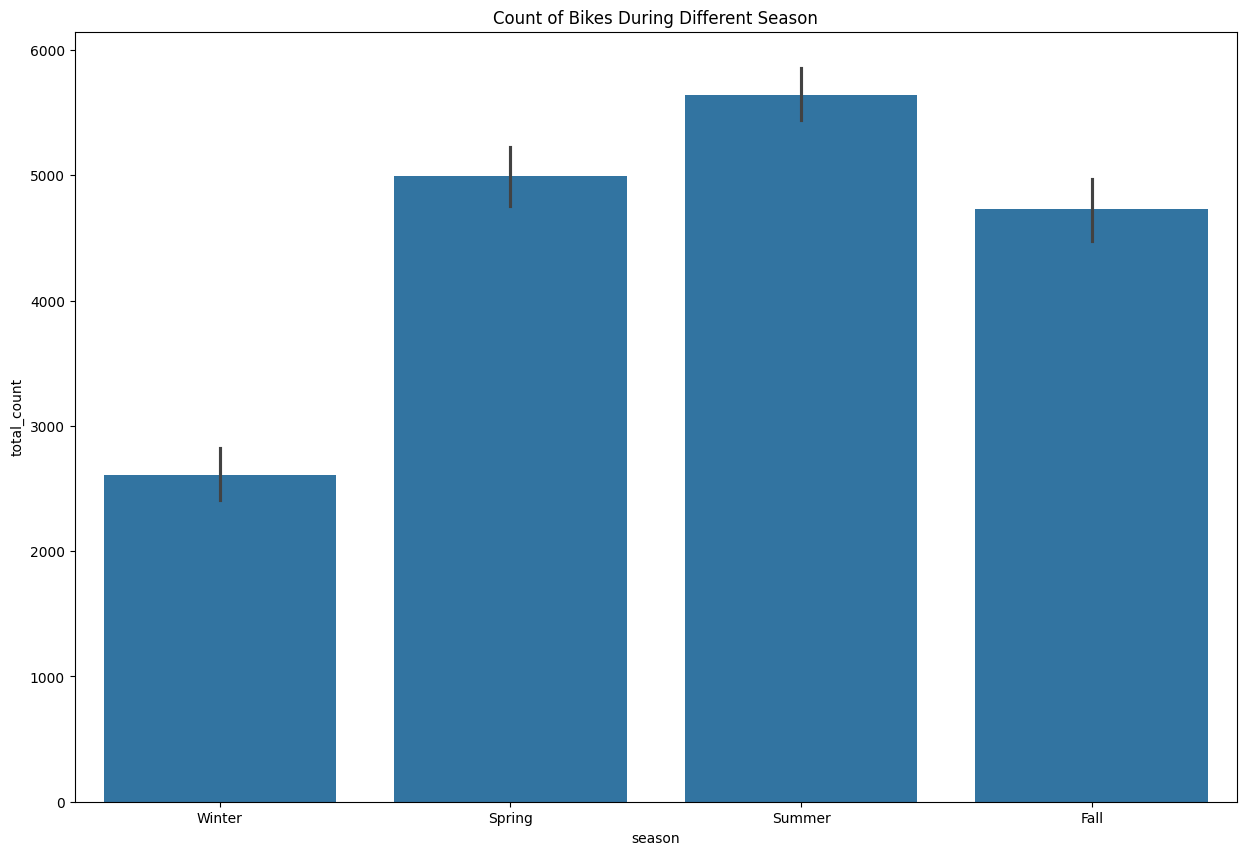

In [30]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(data = day_df, x = "season", y = "total_count", ax = ax)
ax.set(title = 'Count of Bikes During Different Season')

### Pertanyaan 2: Berapa rata-rata persewaan sepeda pada bulan Agustus? Bulan apakah yang memiliki rata-rata tertinggi?

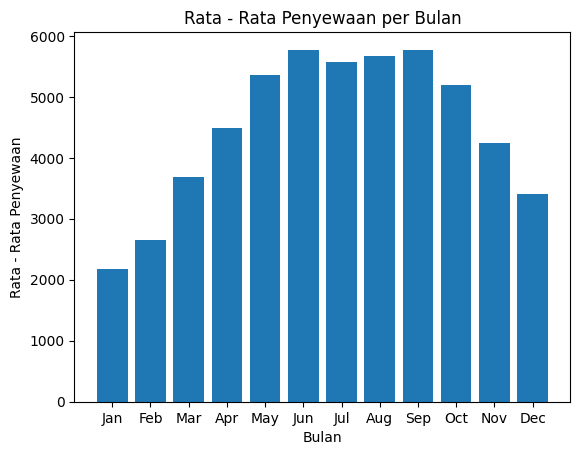

In [31]:
monthly = day_df.groupby('month')['total_count'].mean()

plt.bar(monthly.index, monthly.values, color = '#1f77b4')

plt.title('Rata - Rata Penyewaan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

## Conclusion

- Conclution pertanyaan 1: **Musim yang mengalami persewaan sepeda terbanyak adalah pada musim panas (Summer), yaitu dengan total 1061129 pada periode 2011 - 2012. Sedangkan musim yang mengalami persewaan sepada paling sedikit adalah pada musim dingin (winter), yaitu dengan total 471348**
- Conclution pertanyaan 2: **Rata-rata persewaan sepeda pada bulan Agustus adalah 5664.419355. Bulan yang memiliki rata rata persewaan sepeda tertinggi adalah bulan Juni, yaitu sebesar 5772.366667.**

In [32]:
day_df.to_csv("day_clean.csv", index = False)

In [33]:
hour_df.to_csv("hour_clean.csv", index = False)